# Building your Deep Neural Network: Step by Step

Welcome to your week 4 assignment (part 1 of 2)! You have previously trained a 2-layer Neural Network (with a single hidden layer). This week, you will build a deep neural network, with as many layers as you want!

- In this notebook, you will implement all the functions required to build a deep neural network.
- In the next assignment, you will use these functions to build a deep neural network for image classification.

**After this assignment you will be able to:**
- Use non-linear units like ReLU to improve your model
- Build a deeper neural network (with more than 1 hidden layer)
- Implement an __easy-to-use neural network class__

**Notation**:
- Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer. 
    - Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
- Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example.
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).

Let's get started!

### <font color='darkblue'> Updates to Assignment <font>

#### If you were working on a previous version
* The current notebook filename is version "4a". 
* You can find your work in the file directory as version "4".
* To see the file directory, click on the Coursera logo at the top left of the notebook.

#### List of Updates
* compute_cost unit test now includes tests for Y = 0 as well as Y = 1.  This catches a possible bug before students get graded.
* linear_backward unit test now has a more complete unit test that catches a possible bug before students get graded.


## 1 - Packages

Let's first import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the main package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- __dnn_utils__ from a constructed python class - provides some necessary functions for this notebook.
- __testCases__ from a constructed python class - provides some test cases to assess the correctness of your functions
- np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work. Please don't change the seed. 

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from testCases_v4a import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline #Runtime Config Parameters
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#Auto Reload of Edited Function
%load_ext autoreload
%autoreload 2

np.random.seed(1)

Just FYI:

1.Changing the Defaults: __rcParams: Runtime Config Parameters__

- Each time Matplotlib loads, it defines a runtime configuration (rc) containing the __default styles for every plot element__ you create. 
- This configuration can be adjusted at any time using the plt. matplotlibrc file, which you can read about in the Matplotlib documentation.

__2.Auto Reload of Edited Function:__

`%load_ext autoreload
%autoreload 2`

We can edit functions in editor and __without executing that block of code__, it is  automatically reloaded and reflected. 

## 2 - Outline of the Assignment

To build your neural network, you will be implementing several "helper functions". These helper functions will be used in the next assignment to build a two-layer neural network and an L-layer neural network. Each small helper function you will implement will have detailed instructions that will walk you through the necessary steps. Here is an outline of this assignment, you will:

- Initialize the parameters for a two-layer network and for an $L$-layer neural network.
- Implement the forward propagation module (shown in purple in the figure below).
     - Complete the LINEAR part of a layer's forward propagation step (resulting in $Z^{[l]}$).
     - We give you the ACTIVATION function (relu/sigmoid).
     - Combine the previous two steps into a new [LINEAR->ACTIVATION] forward function.
     - Stack the [LINEAR->RELU] forward function L-1 time (for layers 1 through L-1) and add a [LINEAR->SIGMOID] at the end (for the final layer $L$). This gives you a new L_model_forward function.
- Compute the loss.
- Implement the backward propagation module (denoted in red in the figure below).
    - Complete the LINEAR part of a layer's backward propagation step.
    - We give you the gradient of the ACTIVATE function (relu_backward/sigmoid_backward) 
    - Combine the previous two steps into a new [LINEAR->ACTIVATION] backward function.
    - Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new L_model_backward function
- Finally update the parameters.

<img src="images/final outline.png" style="width:800px;height:500px;">
<caption><center><b>Figure 1 - NN Process Architecture</b></center></caption><br>


**Note** that for every forward function, there is a corresponding backward function. That is why at every step of your forward module you will be storing some values in a cache. The cached values are useful for computing gradients. In the backpropagation module you will then use the cache to calculate the gradients. This assignment will show you exactly how to carry out each of these steps. 

## 3 - Initialization

You will write two helper functions that will initialize the parameters for your model. The first function will be used to initialize parameters for a two layer model. The second one will generalize this initialization process to $L$ layers.

### 3.1 - 2-layer Neural Network

**Exercise**: Create and initialize the parameters of the 2-layer neural network.

**Instructions**:
- The model's structure is: *LINEAR -> RELU -> LINEAR -> SIGMOID*. 
- Use random initialization for the weight matrices. Use `np.random.randn(shape)*0.01` with the correct shape.
- Use zero initialization for the biases. Use `np.zeros(shape)`.

In [1]:
# GRADED FUNCTION: initialize_parameters #intializes parameter of the right order according to inputs
#For weights - We do symmetry breaking. Instead of Zeroes - We initiate very small numbers.
#Large numbers - GD is slow!

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1) #to give same output everytime!
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    ### END CODE HERE ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [3]:
#Feed in NN layer dimensions:
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[ 0.]]


**Expected output**:
       
<table style="width:80%">
<tr>
<td> **W1** </td>
<td> [[ 0.01624345 -0.00611756 -0.00528172]
[-0.01072969  0.00865408 -0.02301539]] </td> 
</tr>

<tr>
<td> **b1**</td>
<td>[[ 0.]
[ 0.]]</td> 
</tr>

<tr>
<td>**W2**</td>
<td> [[ 0.01744812 -0.00761207]]</td>
</tr>

<tr>
<td> **b2** </td>
<td> [[ 0.]] </td> 
</tr>
  
</table>

### 3.2 - L-layer Neural Network

The initialization for a deeper L-layer neural network is more complicated because there are many more weight matrices and bias vectors. When completing the `initialize_parameters_deep`, you should make sure that your dimensions match between each layer. Recall that $n^{[l]}$ is the number of units in layer $l$. Thus for example if the size of our input $X$ is $(12288, 209)$ (with $m=209$ examples) then:

<table style="width:100%">


<tr>
    <td>  </td> 
    <td> **Shape of W** </td> 
    <td> **Shape of b**  </td> 
    <td> **Activation** </td>
    <td> **Shape of Activation** </td> 
<tr>

<tr>
    <td> **Layer 1** </td> 
    <td> $(n^{[1]},12288)$ </td> 
    <td> $(n^{[1]},1)$ </td> 
    <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td> 
    <td> $(n^{[1]},209)$ </td> 
<tr>

<tr>
    <td> **Layer 2** </td> 
    <td> $(n^{[2]}, n^{[1]})$  </td> 
    <td> $(n^{[2]},1)$ </td> 
    <td>$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td> 
    <td> $(n^{[2]}, 209)$ </td> 
<tr>

   <tr>
    <td> $\vdots$ </td> 
    <td> $\vdots$  </td> 
    <td> $\vdots$  </td> 
    <td> $\vdots$</td> 
    <td> $\vdots$  </td> 
<tr>

<tr>
    <td> **Layer L-1** </td> 
    <td> $(n^{[L-1]}, n^{[L-2]})$ </td> 
    <td> $(n^{[L-1]}, 1)$  </td> 
    <td>$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td> 
    <td> $(n^{[L-1]}, 209)$ </td> 
<tr>


<tr>
    <td> **Layer L** </td> 
    <td> $(n^{[L]}, n^{[L-1]})$ </td> 
    <td> $(n^{[L]}, 1)$ </td>
    <td> $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$</td>
    <td> $(n^{[L]}, 209)$  </td> 
<tr>

</table>

Remember that when we compute $W X + b$ in python, it carries out __broadcasting.__ For example, if: 

$$ W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}\tag{2}$$

Then $WX + b$ will be:

$$ WX + b = \begin{bmatrix}
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}\tag{3}  $$

**Exercise: Implement initialization for an L-layer Neural Network.**

**Instructions**:
- The model's structure is __[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID__. I.e., it has $L-1$ layers using a ReLU activation function followed by an output layer with a sigmoid activation function.
- Use **random initialization** for the weight matrices. Use `np.random.randn(shape) * 0.01`.
- Use **zeros initialization** for the biases. Use `np.zeros(shape)`.
- We will store $n^{[l]}$, the number of units in different layers, in a variable `layer_dims`. For example, the `layer_dims` for the "Planar Data classification model" from last week would have been [2,4,1]: There were two inputs, one hidden layer with 4 hidden units, and an output layer with 1 output unit. This means `W1`'s shape was (4,2), `b1` was (4,1), `W2` was (1,4) and `b2` was (1,1). Now you will generalize this to $L$ layers! 
- Here is the implementation for $L=1$ (one layer neural network). It should inspire you to implement the general case (L-layer neural network).
```python
    if L == 1:
        parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01
        parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))
```

In [9]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L): #Automatically taking L-1 Layers NN!
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [12]:
#set Dimensions: 
#parameters = initialize_parameters_deep([5,4,4,4,3]) #we print w1,2 and b1,2 for check but all are calculated!
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[ 0.]
 [ 0.]
 [ 0.]]


**Expected output**:
       
<table style="width:80%">
  <tr>
    <td> **W1** </td>
    <td>[[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]</td> 
  </tr>
  
  <tr>
    <td>**b1** </td>
    <td>[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]</td> 
  </tr>
  
  <tr>
    <td>**W2** </td>
    <td>[[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]</td> 
  </tr>
  
  <tr>
    <td>**b2** </td>
    <td>[[ 0.]
 [ 0.]
 [ 0.]]</td> 
  </tr>
  
</table>

## 4 - Forward propagation module

### 4.1 - Linear Forward 
Now that you have initialized your parameters, you will do the forward propagation module. You will start by implementing some basic functions that you will use later when implementing the model. You will complete three functions in this order:

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid. 
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

where $A^{[0]} = X$. 

**Exercise**: Build the linear part of forward propagation.

**Reminder**:
The mathematical representation of this unit is $Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$. You may also find `np.dot()` useful. If your dimensions don't match, printing `W.shape` may help.

In [14]:
# GRADED FUNCTION: linear_forward using VECTORS: Layer 1 - Step 1:
#Linear Forward indicates calculating Z: 
#Calculate Z and store A,W,b used: 

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W, A) + b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [18]:
#Get A W B Values from predefined test case:
A, W, b = linear_forward_test_case()
#print(A, W, b) #this is also the cache

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))
print(linear_cache)

Z = [[ 3.26295337 -1.23429987]]
(array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ]]), array([[ 1.74481176, -0.7612069 ,  0.3190391 ]]), array([[-0.24937038]]))


**Expected output**:

<table style="width:35%">
  
  <tr>
    <td> **Z** </td>
    <td> [[ 3.26295337 -1.23429987]] </td> 
  </tr>
  
</table>

### 4.2 - Linear-Activation Forward

In this notebook, you will use two activation functions:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. We have provided you with the `sigmoid` function. This function returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call: 
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$. We have provided you with the `relu` function. This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = relu(Z)
```

For more convenience, you are going to group two functions (Linear and Activation) into one function (LINEAR->ACTIVATION). 

Hence, you will implement a __function that does the LINEAR forward step followed by an ACTIVATION forward step.__

**Exercise**: Implement the forward propagation of the *LINEAR->ACTIVATION* layer. 

Mathematical relation is: $A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} +b^{[l]})$ where the activation "g" can be sigmoid() or relu(). Use linear_forward() and the correct activation function.

In [23]:
# GRADED FUNCTION: linear_activation_forward: Layer 1 - Step 2:
#Note that A_prev just denotes A (From previous layer. They could have used it in earlier code also !)

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        
        #calculated by applying in previous function - LINEAR FORWARD
            #Take Z, W,A,b from linear forward function
        Z, linear_cache = linear_forward(A_prev, W, b) 
        
        #get A and calculate activation - based on layer - ACTIVATION FORWARD
            #Use Z in sigmoid function and get A, and store Z in activation_cache
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        
        #calculated by applying in previous function - LINEAR FORWARD
            #Take Z, W,A,b from linear forward function
        Z, linear_cache = linear_forward(A_prev, W, b)
        
        #get A and calculate activation - based on layer - ACTIVATION FORWARD
            #Use Z in sigmoid function and get A, and store Z in activation_cache
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    #this is nothing but A,W,b and Z
    #linear_cache = A,W,b and activation_cache = Z

    return A, cache
    #A and #A,W,b, Z

In [24]:
print(W)
#sigmoid?

[[ 0.50288142 -1.24528809 -1.05795222]]


In [25]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[ 0.96890023  0.11013289]]
With ReLU: A = [[ 3.43896131  0.        ]]


**Expected output**:
       
<table style="width:35%">
  <tr>
    <td> **With sigmoid: A ** </td>
    <td > [[ 0.96890023  0.11013289]]</td> 
  </tr>
  <tr>
    <td> **With ReLU: A ** </td>
    <td > [[ 3.43896131  0.        ]]</td> 
  </tr>
</table>


**Note**: In deep learning, the "[LINEAR->ACTIVATION]" computation is counted as a single layer in the neural network, not two layers. 

__Explanation - FYI:__

- Here __ReLU(Z)__ is applied to ALL LAYERS EXCEPT LAST(Output) - so it is for __L-1 layers__

- __Sigmoid(Z)__ is applied for __Output Layer(L)__

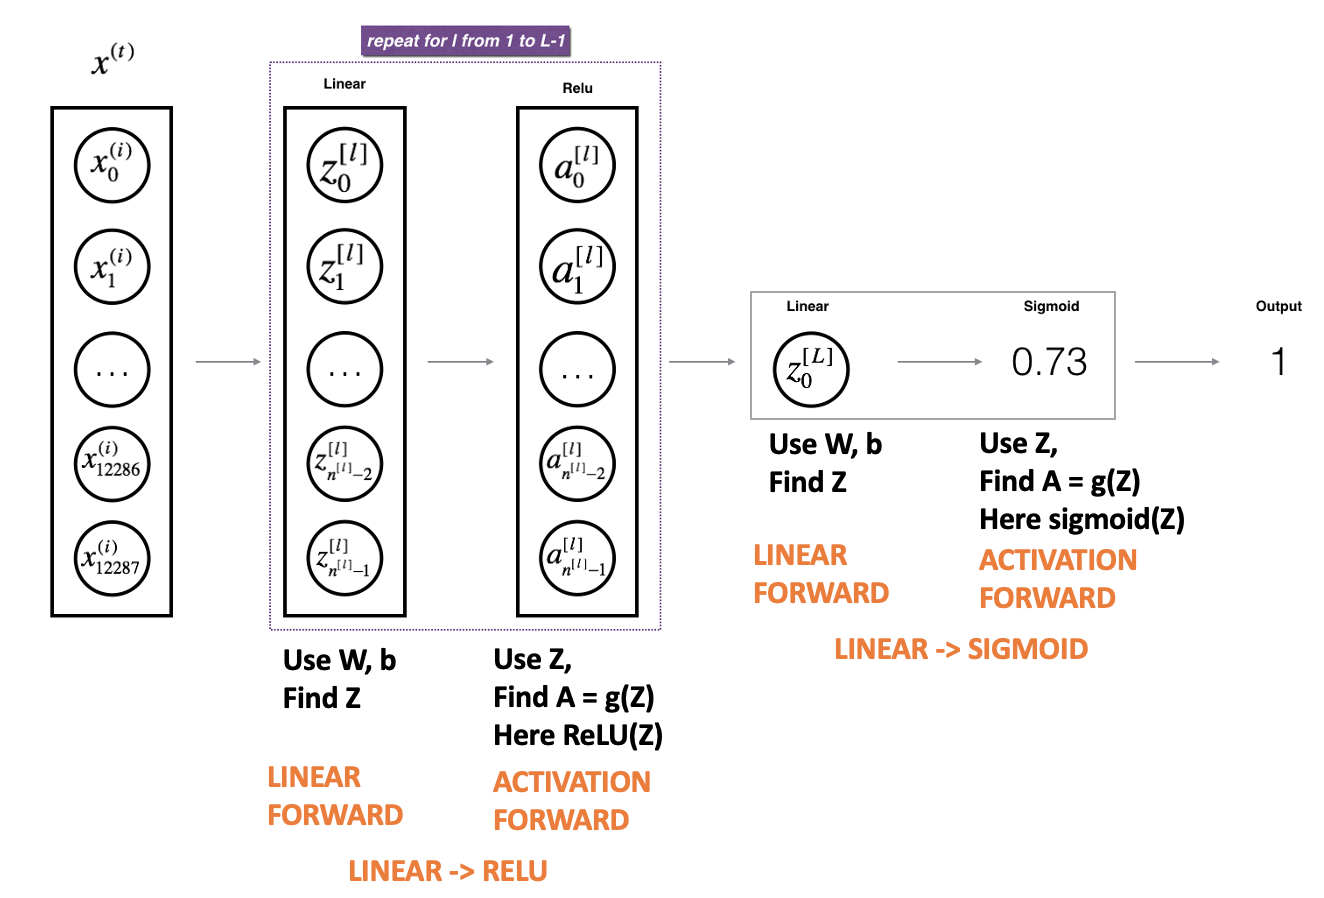

The items used are __cached and returned with calculated item - Z or A__

### d) L-Layer Model 

For even more convenience when implementing the $L$-layer Neural Net, you will need a function that replicates the previous one (`linear_activation_forward` with RELU) $L-1$ times, then follows that with one `linear_activation_forward` with SIGMOID.

<img src="images/model_architecture_kiank.png" style="width:600px;height:300px;">
<caption><center> **Figure 2** : *[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model</center></caption><br>

**Exercise**: Implement the forward propagation of the above model.

**Instruction**: In the code below, the variable `AL` will denote $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$. (This is sometimes also called `Yhat`, i.e., this is $\hat{Y}$.) 

**Tips**:
- Use the functions you had previously written 
- Use a for loop to replicate [LINEAR->RELU] (L-1) times
- Don't forget to keep track of the caches in the "caches" list. To add a new value `c` to a `list`, you can use `list.append(c)`.

In [28]:
# GRADED FUNCTION: L_model_forward - For All Layers:

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value YHat
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    #print('A:',A)
    
    # number of layers in the neural network - Params will have W and b for each layer. So L = p/2
    L = len(parameters) // 2                  
    #print('Layers: ',L)
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    #Here range automatically takes elements from 1 to L-1
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        
        #When calling previous function - give all terms explicitly. 
        #Here W and B values are not there so we need to construct it.
        
        #Get A,  W,A,b and Z from linear_activation_forward:
        A, cache = linear_activation_forward(A_prev, 
                                             W = parameters['W' + str(l)], 
                                             b = parameters['b' + str(l)], 
                                             activation = 'relu')
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    
    #When calling previous function - give all terms explicitly. 
    #Here W and B values are not there so we need to construct it. 
        
    AL, cache = linear_activation_forward(A, 
                                             W = parameters['W' + str(L)], 
                                             b = parameters['b' + str(L)], 
                                             activation = 'sigmoid')
    caches.append(cache)
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [29]:
X, parameters = L_model_forward_test_case_2hidden()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[ 0.03921668  0.70498921  0.19734387  0.04728177]]
Length of caches list = 3


<table style="width:50%">
  <tr>
    <td> **AL** </td>
    <td > [[ 0.03921668  0.70498921  0.19734387  0.04728177]]</td> 
  </tr>
  <tr>
    <td> **Length of caches list ** </td>
    <td > 3 </td> 
  </tr>
</table>

Great! Now you have a full forward propagation that takes the input X and outputs a row vector $A^{[L]}$ containing your predictions. It also records all intermediate values in "caches". 

cache = (linear_cache, activation_cache =  A,W,b and Z from all layers) in a List! 

Using $A^{[L]}$, you can compute the cost of your predictions.

## 5 - Cost function

Now you will implement forward and backward propagation. You need to compute the cost, because you want to check if your model is actually learning. Our cost function is called __cross-entropy cost.__

**Exercise**: Compute the cross-entropy cost $J$, using the following formula: Here Yhat is AL: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


In [25]:
# GRADED FUNCTION: compute_cost between predicted YHat and actual Y

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    
    #NOTE: ALL 3 below methods work: Sum of ELEMENTWISE operation: 
    cost = (-1/m) * (np.sum(Y * np.log(AL) + (1-Y) * np.log(1 - AL))  )
    #cost = (-1/m) * (  np.sum(  np.multiply(Y, np.log(AL)) + np.multiply((1-Y), np.log(1 - AL)) )  )
    #cost = (-1/m) * (np.dot(Y , np.log(AL.T)) + np.dot((1-Y), np.log(1 - AL.T))  ) #Transpose for dimension
    
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [26]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.2797765635793422


**Expected Output**:

<table>

    <tr>
    <td>**cost** </td>
    <td> 0.2797765635793422</td> 
    </tr>
</table>

__FYI: Cross Entropy and Log Loss:__ 

__Cross Entropy__ is the difference between two probability distributions. It ranges from 0 to 1. A perfect model has a cross-entropy loss of 0.
Conceptually it is similar to log loss, but changes in the fact on number of output classes. 

- __Log loss__ is usually used when there are just __two possible outcomes__ that can be either 0 or 1.(Binary Classification) 

- __Cross entropy__ is usually used when there are __three or more possible outcomes.__ (Multiclass Classification)

In words, cross entropy is the negative sum of the products of the logs of the predicted probabilities times the actual probabilities.

## 6 - Backward propagation module

Just like with forward propagation, you will implement helper functions for backpropagation. Remember that back propagation is used to __calculate the gradient__ of the loss function with respect to the parameters. 

**Reminder**: 
<img src="images/backprop_kiank.png" style="width:650px;height:250px;">
<caption><center> **Figure 3** : Forward and Backward propagation for *LINEAR->RELU->LINEAR->SIGMOID* <br> *The purple blocks represent the forward propagation, and the red blocks represent the backward propagation.*  </center></caption>

<!-- 
For those of you who are expert in calculus (you don't need to be to do this assignment), the chain rule of calculus can be used to derive the derivative of the loss $\mathcal{L}$ with respect to $z^{[1]}$ in a 2-layer network as follows:

$$\frac{d \mathcal{L}(a^{[2]},y)}{{dz^{[1]}}} = \frac{d\mathcal{L}(a^{[2]},y)}{{da^{[2]}}}\frac{{da^{[2]}}}{{dz^{[2]}}}\frac{{dz^{[2]}}}{{da^{[1]}}}\frac{{da^{[1]}}}{{dz^{[1]}}} \tag{8} $$

In order to calculate the gradient $dW^{[1]} = \frac{\partial L}{\partial W^{[1]}}$, you use the previous chain rule and you do $dW^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial W^{[1]}}$. During the backpropagation, at each step you multiply your current gradient by the gradient corresponding to the specific layer to get the gradient you wanted.

Equivalently, in order to calculate the gradient $db^{[1]} = \frac{\partial L}{\partial b^{[1]}}$, you use the previous chain rule and you do $db^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial b^{[1]}}$.

This is why we talk about **backpropagation**.
!-->

Now, similar to forward propagation, you are going to build the backward propagation in three steps:
- LINEAR backward
- LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID backward (whole model)

### 6.1 - Linear backward

__For Single Layer:__

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. 

You want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$. 

dW, db from current layer and activation dA to previous layer.

<img src="images/linearback_kiank.png" style="width:250px;height:300px;">
<caption><center> **Figure 4** </center></caption>

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.

Differentiating this equation: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ with respect to W,b, A: (Transpose applied to match order)

Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$


**Exercise**: Use the 3 formulas above to implement linear_backward().

learning: When there is __elements__(Element wise) involved, we can use __row wise sum__ using axis = 1. (Sum down)

In [30]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    #Get A,W,b from cache:
    A_prev, W, b = cache
    m = A_prev.shape[1]
    #print(dZ)

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = (1/m) * (np.dot(dZ, A_prev.T))
    db = (1/m) * np.sum(dZ, axis = 1, keepdims = True) #elements involved!!
    dA_prev = np.dot(W.T, dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [31]:
# Set up some test inputs
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW = [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db = [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]


** Expected Output**:
    
```
dA_prev = 
 [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW = 
 [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db = 
 [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]
```

### 6.2 - Linear-Activation backward

Next, you will create a function that merges the two helper functions: **`linear_backward`** and the backward step for the activation **`linear_activation_backward`**. 

To help you implement `linear_activation_backward`, we provided two backward functions:
- **`sigmoid_backward`**: Implements the backward propagation for SIGMOID unit. You can call it as follows:

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: Implements the backward propagation for RELU unit. You can call it as follows:

```python
dZ = relu_backward(dA, activation_cache)
```

<img src = attachment:Screenshot%202020-12-14%20at%201.59.42%20PM.png style="width:400px;height:75px;">

Apply equation (10) to get below formula:

If $g(.)$ is the activation function, 
`sigmoid_backward` and `relu_backward` compute 

$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  


**Exercise**: Implement the backpropagation for the *LINEAR->ACTIVATION* layer.

In [32]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    
    #get linear and activation caches from cache:
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        #Get dZ from constructed relu_backward and apply in linear backward:
        dZ = relu_backward(dA, activation_cache) #activation_cache = Z
        dA_prev, dW, db = linear_backward(dZ, linear_cache) #linear_cache = A,W,b
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

In [33]:
dAL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


**Expected output with sigmoid:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td >[[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]] </td> 

  </tr> 
  
    <tr>
    <td > dW </td> 
           <td > [[ 0.10266786  0.09778551 -0.01968084]] </td> 
  </tr> 
  
    <tr>
    <td > db </td> 
           <td > [[-0.05729622]] </td> 
  </tr> 
</table>



**Expected output with relu:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td > [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]] </td> 

  </tr> 
  
    <tr>
    <td > dW </td> 
           <td > [[ 0.44513824  0.37371418 -0.10478989]] </td> 
  </tr> 
  
    <tr>
    <td > db </td> 
           <td > [[-0.20837892]] </td> 
  </tr> 
</table>



### 6.3 - L-Model Backward 

Now you will implement the backward function for the whole network. Recall that when you implemented the `L_model_forward` function, at each iteration, you stored a cache which contains (X,W,b, and z). In the back propagation module, you will use those variables to compute the gradients. Therefore, in the `L_model_backward` function, you will iterate through all the hidden layers backward, starting from layer $L$. On each step, you will use the cached values for layer $l$ to backpropagate through layer $l$. Figure 5 below shows the backward pass. 


<img src="images/mn_backward.png" style="width:450px;height:300px;">
<caption><center>  **Figure 5** : Backward pass  </center></caption>

** Initializing backpropagation**:
To backpropagate through this network, we know that the output is, 
$A^{[L]} = \sigma(Z^{[L]})$. Your code thus needs to compute `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$.
To do so, use this formula (__derived using calculus diff(log a) = 1/a__ ):
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

You can then use this post-activation gradient `dAL` to keep going backward. As seen in Figure 5, you can now feed in `dAL` into the LINEAR->SIGMOID backward function you implemented (which will use the cached values stored by the L_model_forward function). After that, you will have to use a `for` loop to iterate through all the other layers using the LINEAR->RELU backward function. You should store each dA, dW, and db in the grads dictionary. To do so, use this formula : 

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

For example, for $l=3$ this would store $dW^{[l]}$ in `grads["dW3"]`.

**Exercise**: Implement backpropagation for the *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model.

In [34]:
# GRADED FUNCTION: L_model_backward - NOT CLEAR!!

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    # A,W,b and Z from all layers. Will have as many arrays as no of layers [[A1,W1,b1,Z1],[A2,W2,b2,Z2]...[AL,WL,bL,ZL]]
    L = len(caches) 
    
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL to apply in dAL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. 
    #Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    
    #to get Last Cache value - caches[0],caches[1]...caches[L-1]
    current_cache = caches[L-1] 
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    ### END CODE HERE ###
    
    for l in reversed(range(L-1)): #Last Layer L-1, Last but one L-2, ... 2, 1, 0(Layer 1)
        
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l] #Start from last cache value to first cache value
        
        #For each calculate dA,dW,db:
        #From last layer L - we find dAL with dWL-1, dAL-1, dbL-1
        #. . . . . . . . . . . . . . .
        #. . . . . . . . . . . . . . .
        #From 3rd layer - we find dA3 with dW2,dA2,db2
        #From 2nd layer - we find dA2 with dW1,dA1,db1
        
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+2)], current_cache, "relu")
        grads["dA" + str(l + 1)] = dA_prev
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

In [35]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)


print_grads(grads)

dW1 = [[ 0.41010002  0.07807203  0.13798444  0.10502167]
 [ 0.          0.          0.          0.        ]
 [ 0.05283652  0.01005865  0.01777766  0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]


**Expected Output**

<table style="width:60%">
  
  <tr>
    <td > dW1 </td> 
           <td > [[ 0.41010002  0.07807203  0.13798444  0.10502167]
 [ 0.          0.          0.          0.        ]
 [ 0.05283652  0.01005865  0.01777766  0.0135308 ]] </td> 
  </tr> 
  
    <tr>
    <td > db1 </td> 
           <td > [[-0.22007063]
 [ 0.        ]
 [-0.02835349]] </td> 
  </tr> 
  
  <tr>
  <td > dA1 </td> 
           <td > [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]] </td> 

  </tr> 
</table>



### 6.4 - Update Parameters

In this section you will update the parameters of the model, using gradient descent: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary. 

**Exercise**: Implement `update_parameters()` to update your parameters using gradient descent.

**Instructions**:
Update parameters using gradient descent on every $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$. 


In [74]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(1,L+1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - (learning_rate *  grads["dW" + str(l)])
        parameters["b" + str(l)] = parameters["b" + str(l)] - (learning_rate * grads["db" + str(l)])
    ### END CODE HERE ###
    return parameters

In [75]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**Expected Output**:

<table style="width:100%"> 
    <tr>
    <td > W1 </td> 
           <td > [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]] </td> 
  </tr> 
  
    <tr>
    <td > b1 </td> 
           <td > [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]] </td> 
  </tr> 
  <tr>
    <td > W2 </td> 
           <td > [[-0.55569196  0.0354055   1.32964895]]</td> 
  </tr> 
  
    <tr>
    <td > b2 </td> 
           <td > [[-0.84610769]] </td> 
  </tr> 
</table>



## 7 - Conclusion

Congrats on implementing all the functions required for building a deep neural network! 

We know it was a long assignment but going forward it will only get better. The next part of the assignment is easier. 

In the next assignment you will put all these together to build two models:
- A two-layer neural network
- An L-layer neural network

You will in fact use these models to classify cat vs non-cat images!